<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variables-to-control" data-toc-modified-id="Variables-to-control-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variables to control</a></span></li><li><span><a href="#Load-and-plot-results" data-toc-modified-id="Load-and-plot-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and plot results</a></span></li></ul></div>

# Validate 2 channels optimal configuration results

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from qcd.optimizationresults.globaloptimizationresults import GlobalOptimizationResults
from qcd.optimizationresults.globaloptimizationresults.global_aux import build_optimization_result
from qcd import save_object_to_disk, load_object_from_file
import numpy as np

## Variables to control

In [2]:
# Filenames with results for 3 etas and their optimized parameters to LOAD
# filename = '20210321_results_CRS'
# filename = '20210331_C1_CRS_clons'
filename = '20210502b_C1_A1_1000_10000_2_0_20'
# filename = '20210501a_C1_A1_1000_10000_2_1_20'
path = 'results/'

## Load and plot results

In [3]:
results = GlobalOptimizationResults.load_results(file_names=filename,path=path)

In [4]:
results.validate_optimal_configurations_one_qubit(plays=10000)

number of eta groups to validate: 210
Going to validate this eta group: (4, 0)
Optimal Probability: 51.0% Validated Probability: 50.08 % Difference (absolute value): 0.92%
Group of etas # 0 of 210
total time taken so far: 0 minutes and 0 seconds
Going to validate this eta group: (49, 0)
Optimal Probability: 79.76% Validated Probability: 79.2 % Difference (absolute value): 0.56%
Group of etas # 10 of 210
total time taken so far: 0 minutes and 5 seconds
Going to validate this eta group: (9, 4)
Optimal Probability: 51.5% Validated Probability: 51.15 % Difference (absolute value): 0.36%
Group of etas # 20 of 210
total time taken so far: 0 minutes and 10 seconds
Going to validate this eta group: (54, 4)
Optimal Probability: 83.17% Validated Probability: 82.42 % Difference (absolute value): 0.74%
Group of etas # 30 of 210
total time taken so far: 0 minutes and 15 seconds
Going to validate this eta group: (18, 9)
Optimal Probability: 54.05% Validated Probability: 53.44 % Difference (absolute 

In [5]:
save_object_to_disk(results, name='20210502b_C1_A1_1000_10000_2_0_20_validated_10000', path=path)

In [6]:
validated_results = load_object_from_file(name='20210502b_C1_A1_1000_10000_2_0_20_validated_10000', path='results/')

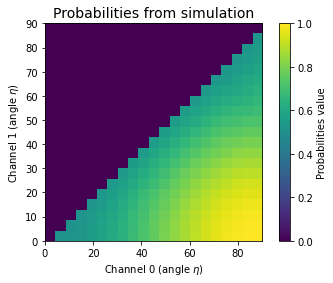

In [7]:
validated_results.plot_probabilities(results_index=0)

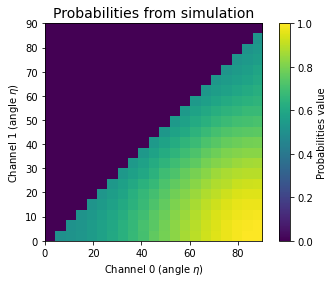

In [8]:
validated_results.plot_probabilities(results_index=1)

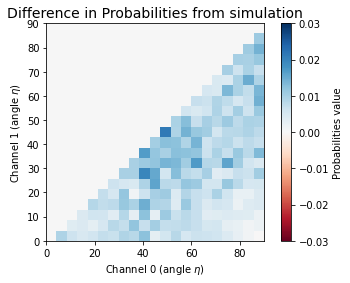

In [11]:
validated_results.plot_probabilities_comparison(results_index1=0,
                                      results_index2=1,
                                      vmin=-0.03,
                                    vmax=0.03)

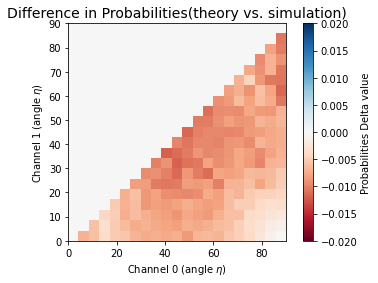

In [12]:
validated_results.plot_probabilities_comparison_with_theoretical_result(results_index=0,
                                                              strategy='one_shot',
                                                              vmin= -0.02,
                                                              vmax= 0.02)

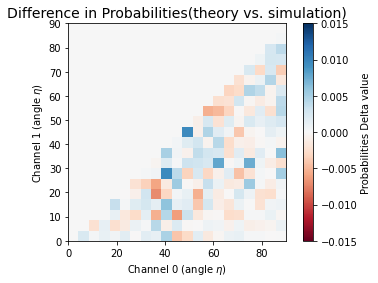

In [15]:
validated_results.plot_probabilities_comparison_with_theoretical_result(results_index=1,
                                                              strategy='one_shot',
                                                              vmin= -0.015,
                                                              vmax= 0.015)

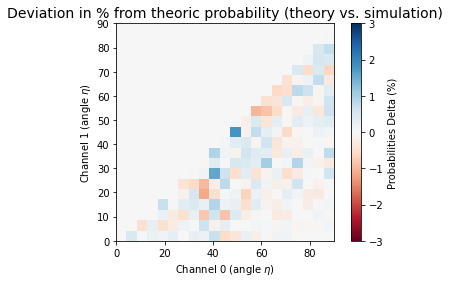

In [20]:
results.plot_probabilities_comparison_percentage(results_index=1,
                                                 strategy='one_shot',
                                                 vmin= -3,
                                                 vmax= 3)